<a href="https://colab.research.google.com/github/pooJa-verMa14/Machine-Learning/blob/main/Linear_Regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Linear Regression with one variable**

https://drive.google.com/drive/u/1/folders/1zpbMkootmlABva6evQr2tsnMPCsBiazv

Link to download Dataset

ex1data1.txt - Dataset for linear regression with one variable

ex1data2.txt - Dataset for linear regression with multiple variable


In [1]:
# Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     warmUpExercise
#     plotData
#     gradientDescent
#     computeCost
#     gradientDescentMulti
#     computeCostMulti
#     featureNormalize
#     normalEqn
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s
#


In [3]:
import numpy as np    # Used to solve linear algebra problems in python

In [4]:
import pandas as pd   # Tool for loading data

In [5]:
def warmUpExercise():
#WARMUPEXERCISE Example function in octave
#WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

# ============= YOUR CODE HERE ==============
  return np.identity(5)
# ===========================================

In [6]:
# ==================== Part 1: Basic Function ====================
# Complete warmUpExercise

print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
import matplotlib.pyplot as plt   # DataVisualization library in python

In [8]:
def plotData(x, y,label1):
#   PLOTDATA Plots the data points x and y into a new figure 
#   PLOTDATA(x,y) plots the data points and gives the figure axes labels of
#   population and profit.

# ====================== YOUR CODE HERE ======================
# Instructions: Plot the training data into a figure using the 
#               matplotlib library. Set the axes labels using
#               the "plt.xlabel" and "plt.ylabel" commands. Assume the 
#               population and revenue data have been passed in
#               as the x and y arguments of this function.
#
# Hint: You can use the 'red and marker = '*' option with plot to have the markers
#       appear as red crosses. Furthermore, you can make the
#       markers larger by using plot(..., 'red', Marker = '*' ,s= 10);

    plt.scatter(x,y,label=label1)              # Function to plot Scatter 
    plt.xlabel('Population of city in 10,000s');     
    plt.ylabel('Profit in $10,000s');

# ============================================================


Plotting Data ...


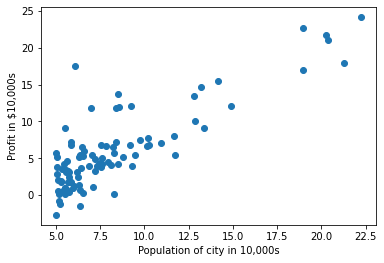

In [17]:
# ======================= Part 2: Plotting =======================

print('Plotting Data ...')
data = pd.read_csv('/content/drive/MyDrive/Machine learning/ex1/ex1data1.txt')
X = data.iloc[:, [0]]
y = data.iloc[:, [1]]
m = len(y); # number of training examples

# Plot Data
# Note: You have to complete the code in plotData
plotData(X, y,'Training data')


In [10]:
def computeCost(X, y, theta):
  #   COMPUTECOST Compute cost for linear regression
  #   COMPUTECOST(X, y, theta) computes the cost of using theta as the
  #   parameter for linear regression to fit the data points in X and y

  # Initialize some useful values
   m = len(y)  # number of training examples

  # You need to return the following variables correctly 
   J = 0

  # ====================== YOUR CODE HERE ======================
  # Instructions: Compute the cost of a particular choice of theta
  #               You should set J to the cost.

   h = np.dot(X,theta)
   Square = (h-y)**2
   J = 1/(2*m)*np.sum(Square)

   return J

#=========================================================================

In [18]:
def gradientDescent1(X, y, theta, alpha, num_iters):
    #   GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))    
    for iter in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #      of the cost function (computeCost) and gradient here.
        #

        A = np.dot(X.transpose(),X)

        delta = 1/m * (np.dot(A,theta) - np.dot(X.transpose(),y))
        theta = theta - alpha*delta
        #print(theta.shape)
        # ============================================================

        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
    return theta

In [12]:
def gradientDescent1(X, y, theta, alpha, num_iters):
  m = len(y) # number of training examples
  J_history = np.zeros((num_iters, 1))    
  for iter in range(num_iters):
    A = np.dot(X.transpose(),X)

    delta = 1/m * (np.dot(A,theta) - np.dot(X.transpose(),y))
    theta = theta - alpha*delta  
    J_history[iter] = computeCost(X, y, theta)
  return J_history 


In [19]:
# =================== Part 3: Gradient descent ===================
print('Running Gradient Descent ...\n')

X = np.append(np.ones((m,1)), X ,axis=1 )  # Add a column of ones to x
theta = np.zeros((2, 1))  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
print(computeCost(X, y, theta))

# run gradient descent
theta = gradientDescent1(X, y, theta, alpha, iterations)
print(theta.shape)

# print theta to screen
print(f'Theta found by gradient descent: {theta[0]}, {theta[1]}')

Running Gradient Descent ...

profit    32.072734
dtype: float64
(2, 1)
Theta found by gradient descent: [-3.63029144], [1.16636235]


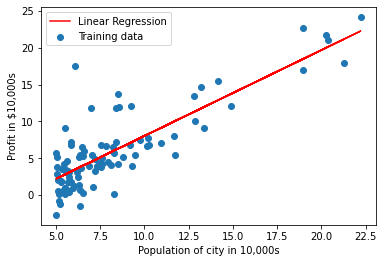

In [20]:
# Plot the linear fit
plotData(X[:, 1], y,'Training data')
plt.plot(X[:, 1], np.dot(X,theta),'r',label = 'Linear Regression')
plt.legend()

In [21]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([[1, 3.5]],theta)
print(f'For population = 35,000, we predict a profit of {predict1*10000}');
predict2 = np.dot([[1, 7]],theta)
print(f'For population = 70,000, we predict a profit of {predict2*10000}');


For population = 35,000, we predict a profit of [[4519.7678677]]
For population = 70,000, we predict a profit of [[45342.45012945]]
